In [1]:
import os
import sys
import shutil

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils import region_formatter, path_utils

In [4]:
pathUtils = path_utils.PathUtils()

In [5]:
fig_plots = []

In [6]:
git_root_path = pathUtils.get_git_root(os.getcwd())
dataframes_path = "{}/dataframes".format(git_root_path)

In [7]:
%run ../dataframes/provinces_gdf.ipynb -i
provinces_gdf = pd.read_pickle("{}/provinces_gdf.pkl".format(dataframes_path))

In [8]:
%run ../dataframes/asl.ipynb -i
df_asl = pd.read_pickle("{}/df_asl.pkl".format(dataframes_path))

In [9]:
%run ../dataframes/dism_first_access.ipynb -i
df_dism_first_access = pd.read_pickle("{}/df_dism_first_access.pkl".format(dataframes_path))

In [10]:
%run ../datasets/dism_provincia_mapper.ipynb -i

In [11]:
newcmp = LinearSegmentedColormap.from_list("", ["#a3b18a", "#588157","#3a5a40"])

In [12]:
### Constants
OUTPUT_DIR = "output"
TARGET_GROUP = "Alcolismo e tossicomanie"
TARGET_GROUP_TEXT = "Alcolismo e tossicomanie"
YEAR = "2022"
# CMAP = (ListedColormap(['cyan', 'yellow', 'orange']))
CMAP = newcmp

In [13]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

In [14]:
REGION_COLOURS = {
    "Nord": "#344e41", 
    "Centro": "#588157",
    "Sud e Isole": "#dad7cd",
}

In [15]:
if not os.path.exists(OUTPUT_DIR):
    # Create the directory
    os.makedirs(OUTPUT_DIR)

In [16]:
folder = OUTPUT_DIR
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

# prepare dataframe

In [17]:
df = df_dism_first_access.loc[df_dism_first_access["gruppo_diagnostico"] == TARGET_GROUP, [
    "codice_asl", 
    "descrizione_regione",
    "sesso",
    "numero_accessi",
    "asl"
]]

In [18]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,asl
0,203,PIEMONTE,Maschio,271,to3
11,203,PIEMONTE,Femmina,153,to3
22,204,PIEMONTE,Maschio,244,to4
33,204,PIEMONTE,Femmina,99,to4
44,205,PIEMONTE,Maschio,190,to5
...,...,...,...,...,...
2852,305,SARDEGNA,Maschio,31,asl n. 5 di oristano
2862,305,SARDEGNA,Femmina,20,asl n. 5 di oristano
2872,306,SARDEGNA,Maschio,15,asl n. 6 del medio campidano
2891,308,SARDEGNA,Maschio,173,asl n. 8 di cagliari


In [19]:
df_asl

,anno,codice_regione,denominazione_regione,codice_azienda,denominazione_azienda,indirizzo,cap,comune,sigla_provincia,telefono,fax,e-mail,sito_web,partita_iva,denominazione_azienda_compatibile
0,2010,10,PIEMONTE,201,to1,VIA S.SECONDO 29,10128,TORINO,TO,NaN,NaN,NaN,NaN,NaN,asl citta' di torino
1,2010,10,PIEMONTE,202,to2,CORSO SVIZZERA 164,10149,TORINO,TO,NaN,NaN,NaN,NaN,NaN,asl citta' di torino
2,2010,10,PIEMONTE,203,to3,VIA MARTIRI XXX APRILE 30,10093,COLLEGNO,TO,NaN,NaN,NaN,NaN,NaN,to3
3,2010,10,PIEMONTE,204,to4,Via Po 11,10034,CHIVASSO,TO,NaN,NaN,NaN,NaN,NaN,to4
4,2010,10,PIEMONTE,205,to5,VIA SAN DOMENICO 21,10023,CHIERI,TO,NaN,NaN,NaN,NaN,NaN,to5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801,2024,200,SARDEGNA,304,asl n. 4 dell'ogliastra,VIA PISCINAS 1,8045,LANUSEI,NU,NaN,NaN,direzione.generale@aslogliastra.it,www.aslogliastra.it,1.620421e+09,asl n. 4 dell'ogliastra
1802,2024,200,SARDEGNA,305,asl n. 5 di oristano,VIA CARDUCCI 35,9170,ORISTANO,OR,NaN,NaN,direzione.generale@asloristano.it,nuovo.asloristano.it/a,1.258181e+09,asl n. 5 di oristano
1803,2024,200,SARDEGNA,306,asl n. 6 del medio campidano,VIA GIUSEPPE UNGARETTI 9,9025,SANLURI,SU,07093841,07093841,direzione.generale@aslmediocampidano.it,www.aslmediocampidano.it,3.990321e+09,asl n. 6 del medio campidano
1804,2024,200,SARDEGNA,307,asl n. 7 del sulcis,VIA DALMAZIA 83,9013,CARBONIA,SU,07816681,07816681,direzione.generale@aslsulcis.it,www.aslsulcis.it,3.990311e+09,asl n. 7 del sulcis


In [20]:
df_asl = df_asl[["anno", "comune", "codice_azienda", "sigla_provincia", "denominazione_azienda_compatibile"]]

In [21]:
df_asl = df_asl.groupby(['denominazione_azienda_compatibile', "comune", "sigla_provincia"])['anno'].max().reset_index()

In [22]:
df_asl

,denominazione_azienda_compatibile,comune,sigla_provincia,anno
0,a.s.l. avellino,AVELLINO,AV,2024
1,a.s.l. benevento,BENEVENTO,BN,2024
2,a.s.l. caserta,CASERTA,CE,2024
3,a.s.l. napoli 1 centro,NAPOLI,NA,2024
4,a.s.l. napoli 2 nord,FRATTAMAGGIORE,NA,2024
...,...,...,...,...
161,to5,CHIERI,TO,2024
162,trento,TRENTO,TN,2024
163,vc,VERCELLI,VC,2024
164,vco,OMEGNA,VB,2024


In [23]:
provinces_gdf = provinces_gdf[["prov_acr", "geometry", "zone", "prov_name"]]

In [24]:
df_incompatible_names = df.set_index("asl").join(df_asl.set_index("denominazione_azienda_compatibile"), how="right").reset_index()

In [25]:
missing_asl_mask = df_incompatible_names.numero_accessi.isna()

In [26]:
df_incompatible_names.loc[missing_asl_mask, ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
28,a.s.p. vibo valentia,NaN,NaN,NaN,NaN,VIBO VALENTIA,VV,2024
49,asl n. 2 della gallura,NaN,NaN,NaN,NaN,OLBIA,OT,2016
50,asl n. 2 della gallura,NaN,NaN,NaN,NaN,OLBIA,SS,2024
61,asl n. 7 del sulcis,NaN,NaN,NaN,NaN,CARBONIA,SU,2024
180,ats della montagna,NaN,NaN,NaN,NaN,SONDRIO,SO,2024
317,carbonia,NaN,NaN,NaN,NaN,CARBONIA,CI,2016
318,carbonia,NaN,NaN,NaN,NaN,IGLESIAS,CI,2010


In [27]:
df = df.set_index("asl").join(df_asl.set_index("denominazione_azienda_compatibile"))

In [28]:
df

,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
asl,,,,,,,
to3,203,PIEMONTE,Maschio,271,COLLEGNO,TO,2024.0
to3,203,PIEMONTE,Femmina,153,COLLEGNO,TO,2024.0
to4,204,PIEMONTE,Maschio,244,CHIVASSO,TO,2024.0
to4,204,PIEMONTE,Femmina,99,CHIVASSO,TO,2024.0
to5,205,PIEMONTE,Maschio,190,CHIERI,TO,2024.0
...,...,...,...,...,...,...,...
asl n. 6 del medio campidano,306,SARDEGNA,Maschio,15,SANLURI,VS,2016.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,173,CAGLIARI,CA,2024.0
asl n. 8 di cagliari,308,SARDEGNA,Maschio,173,SELARGIUS,CA,2022.0


In [29]:
df = df.reset_index()

In [30]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [31]:
df.loc[missing_mask_sigla_provincia,]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno
44,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Maschio,363,NaN,NaN,NaN
45,asst grande ospedale metropolitano nigua,701,LOMBARDIA,Femmina,143,NaN,NaN,NaN
46,asst santi paolo e carlo,702,LOMBARDIA,Maschio,575,NaN,NaN,NaN
47,asst santi paolo e carlo,702,LOMBARDIA,Femmina,203,NaN,NaN,NaN
48,asst fatebenefratelli sacco,703,LOMBARDIA,Maschio,464,NaN,NaN,NaN
49,asst fatebenefratelli sacco,703,LOMBARDIA,Femmina,181,NaN,NaN,NaN
50,asst ovest milanese,705,LOMBARDIA,Maschio,254,NaN,NaN,NaN
51,asst ovest milanese,705,LOMBARDIA,Femmina,60,NaN,NaN,NaN
52,asst rhodense,706,LOMBARDIA,Maschio,249,NaN,NaN,NaN
53,asst rhodense,706,LOMBARDIA,Femmina,53,NaN,NaN,NaN


In [32]:
df.loc[missing_mask_sigla_provincia, 'sigla_provincia'] = df.loc[missing_mask_sigla_provincia, 'asl'].str.lower().map(dism_provincia_map)


In [33]:
missing_mask_sigla_provincia = df['sigla_provincia'].isna()

In [34]:
df.loc[missing_mask_sigla_provincia, ]

,asl,codice_asl,descrizione_regione,sesso,numero_accessi,comune,sigla_provincia,anno


In [35]:
df_dism_agg = df.reset_index()[["asl", "sigla_provincia"]].pivot_table(
    index='sigla_provincia',
    aggfunc='count',
)

In [36]:
df_dism_agg

,asl
sigla_provincia,
AG,1
AL,4
AN,10
AO,2
AP,10
...,...
VE,8
VI,8
VR,7


In [37]:
df_dism_agg = df_dism_agg.rename(columns={
    "asl": "dism_count",
})

In [38]:
df_dism_agg.filter(items=['LI'], axis=0)

,dism_count
LI,2


In [39]:
df = df.reset_index()

In [40]:
df = df.pivot_table(
    index='sigla_provincia',
    aggfunc='sum',
    values='numero_accessi'
)

In [41]:
df

,numero_accessi
sigla_provincia,
AG,85
AL,408
AN,1063
AO,164
AP,1063
...,...
VE,2122
VI,2208
VR,2256


In [42]:
df = df.join(df_dism_agg)

In [43]:
df = df.assign(target_group_avg=lambda df_: df_.numero_accessi / df_.dism_count)

In [44]:
df

,numero_accessi,dism_count,target_group_avg
sigla_provincia,,,
AG,85,1,85.000000
AL,408,4,102.000000
AN,1063,10,106.300000
AO,164,2,82.000000
AP,1063,10,106.300000
...,...,...,...
VE,2122,8,265.250000
VI,2208,8,276.000000
VR,2256,7,322.285714


In [45]:
df = provinces_gdf.set_index("prov_acr").join(df)

In [46]:
df

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
TO,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",Nord,Torino,1853.0,8.0,231.625
VC,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",Nord,Vercelli,176.0,2.0,88.000
NO,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",Nord,Novara,340.0,2.0,170.000
CN,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",Nord,Cuneo,626.0,4.0,156.500
AT,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",Nord,Asti,152.0,2.0,76.000
...,...,...,...,...,...,...
SS,"MULTIPOLYGON (((9.46502 40.65584, 9.46475 40.6...",Sud e Isole,Sassari,76.0,2.0,38.000
NU,"MULTIPOLYGON (((9.28037 39.91741, 9.27741 39.9...",Sud e Isole,Nuoro,46.0,4.0,11.500
CA,"MULTIPOLYGON (((8.84872 39.09924, 8.84697 39.1...",Sud e Isole,Cagliari,424.0,4.0,106.000


In [47]:
plot_title = "Totale accessi con diagnosi '{}'\n per DSM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

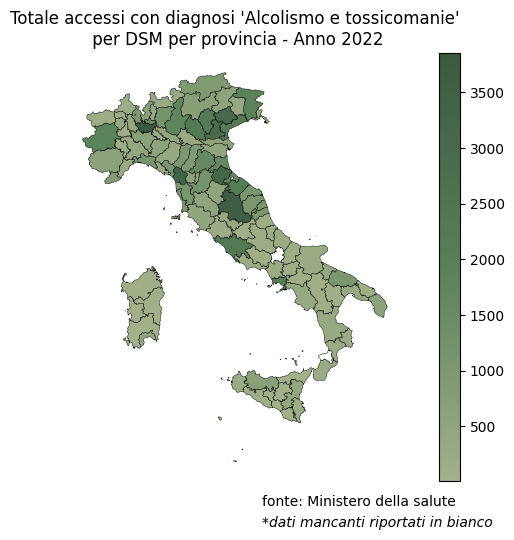

In [48]:
df_plot = df.plot(
    column="numero_accessi",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('*dati mancanti riportati in bianco', (0,0), (140, -25), xycoords='axes fraction', textcoords='offset points', va='top', style='italic')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

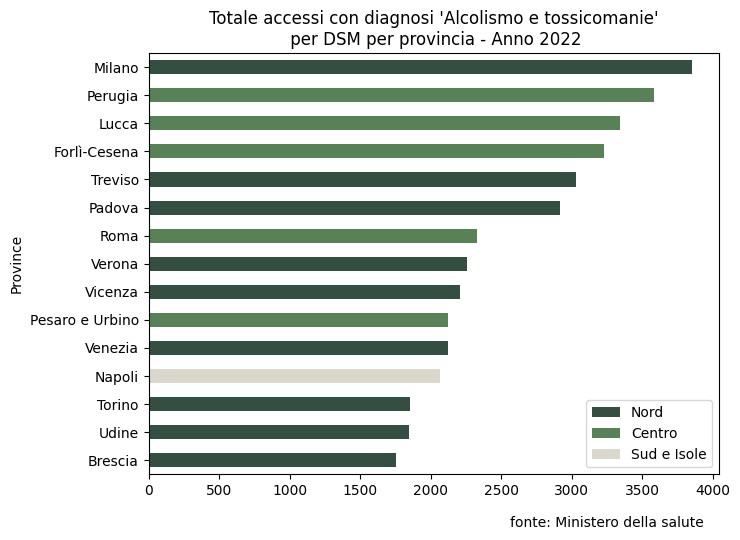

In [49]:
best_rows = df.sort_values(by=['numero_accessi'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['numero_accessi'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    y="numero_accessi",
    x="prov_name",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

In [50]:
best_rows

,geometry,zone,prov_name,numero_accessi,dism_count,target_group_avg
prov_acr,,,,,,
MI,"MULTIPOLYGON (((8.84290 45.39384, 8.84219 45.3...",Nord,Milano,3853.0,22.0,175.136364
PG,"MULTIPOLYGON (((13.15849 42.65425, 13.15764 42...",Centro,Perugia,3586.0,8.0,448.250000
LU,"POLYGON ((10.70536 43.84269, 10.70666 43.84232...",Centro,Lucca,3342.0,6.0,557.000000
FC,"POLYGON ((11.95117 43.78699, 11.95053 43.78787...",Centro,Forlì-Cesena,3228.0,12.0,269.000000
TV,"POLYGON ((11.80324 45.79994, 11.79414 45.79929...",Nord,Treviso,3030.0,6.0,505.000000
PD,"POLYGON ((11.98296 45.16275, 11.98343 45.15557...",Nord,Padova,2916.0,10.0,291.600000
RM,"MULTIPOLYGON (((11.82281 42.14649, 11.82464 42...",Centro,Roma,2332.0,12.0,194.333333
VR,"POLYGON ((11.33151 45.38763, 11.33084 45.38717...",Nord,Verona,2256.0,7.0,322.285714
VI,"POLYGON ((11.61227 45.32540, 11.61449 45.31729...",Nord,Vicenza,2208.0,8.0,276.000000


In [51]:
plot_title = "Media accessi con diagnosi '{}'\n per DSM per provincia - Anno {}".format(
    TARGET_GROUP_TEXT,
    YEAR
)

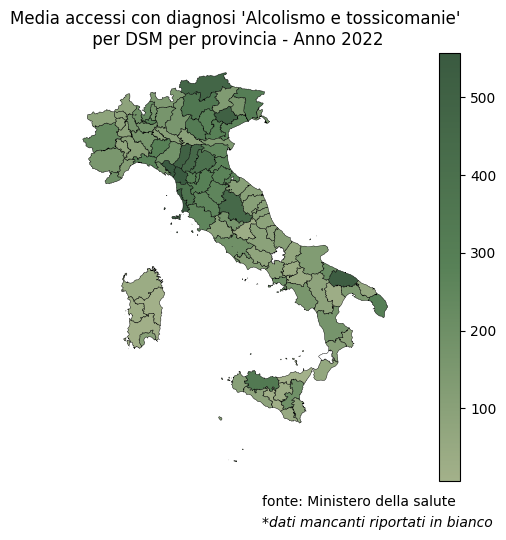

In [52]:
df_plot = df.plot(
    column="target_group_avg",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('*dati mancanti riportati in bianco', (0,0), (140, -25), xycoords='axes fraction', textcoords='offset points', va='top', style='italic')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

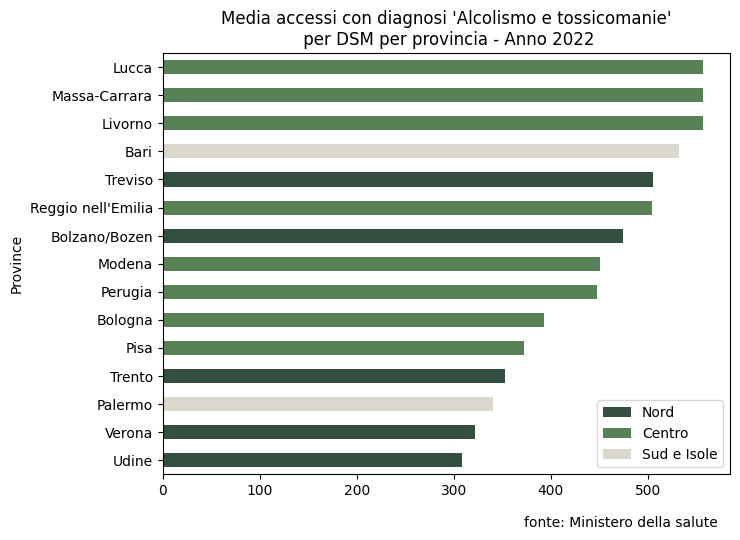

In [53]:
best_rows = df.sort_values(by=['target_group_avg'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['target_group_avg'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="target_group_avg",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

In [54]:
plot_title = "Numero di DSM per provincia - Anno {}".format(
    YEAR
)

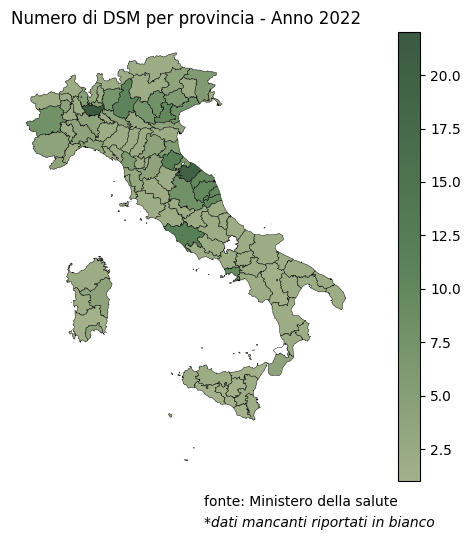

In [55]:
df_plot = df.plot(
    column="dism_count",
    legend=True,
    cmap=CMAP,
    edgecolor="black",
    linewidth=0.3,
    missing_kwds={
        "color": "white",
        "edgecolor": "black",
        "label": "Missing values",
    }
);
plt.title(plot_title)
df_plot.set_axis_off()
plt.annotate('fonte: Ministero della salute', (0,0), (140, -10), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('*dati mancanti riportati in bianco', (0,0), (140, -25), xycoords='axes fraction', textcoords='offset points', va='top', style='italic')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

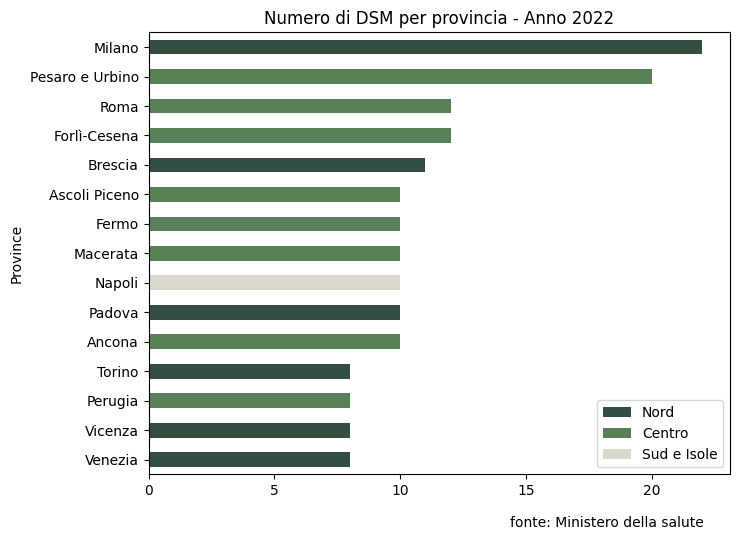

In [56]:
best_rows = df.sort_values(by=['dism_count'], ascending=False).head(15)
best_rows_sorted = best_rows.sort_values(by=['dism_count'])
df_plot = best_rows_sorted.plot.barh(
    title=plot_title,
    x="prov_name",
    y="dism_count",
    ylabel='Province',
    color=best_rows_sorted['zone'].replace(REGION_COLOURS)
).legend(
    [
        Patch(facecolor=REGION_COLOURS['Nord']),
        Patch(facecolor=REGION_COLOURS['Centro']),
        Patch(facecolor=REGION_COLOURS['Sud e Isole']),
    ], ["Nord", "Centro", 'Sud e Isole']
)
plt.annotate('fonte: Ministero della salute', (0,0), (260, -30), xycoords='axes fraction', textcoords='offset points', va='top')
fig_plots.append({
    "df": df_plot,
    "name": plot_title
})

In [57]:
for i, fig_plot in enumerate(fig_plots, start=1):
    df_ = fig_plot.get("df")
    df_name = fig_plot.get("name")
    file_name = "{}/{}_{}.png".format(OUTPUT_DIR, i, df_name)
    df_.get_figure().savefig(file_name)